In [1]:
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

import eternabench as eb
from RiboGraphViz import RGV
from scipy.stats import spearmanr, pearsonr
import sys, os
#draw_rna
from ipynb.draw import draw_struct


Populating the interactive namespace from numpy and matplotlib


In this notebook:

- Figure 1B -- Cloud lab project metadata

- Figure 1D -- Cloud lab dataset statistics

- Figure S3 -- Cloud lab filtering descriptive stats

- Figure S6 -- Correlations of Dataset statistics and mean package correlation

- Figure S14 -- EternaFold train/holdout descriptive stats



In [17]:
df = pd.read_json('CloudLabMetadata.json.zip')

# see GenerateCloudLabProjectMetadata.py for generating
proj_stats = pd.read_json('proj_stats.json.zip')
proj_stats_filt = pd.read_json('proj_stats_filt.json.zip')

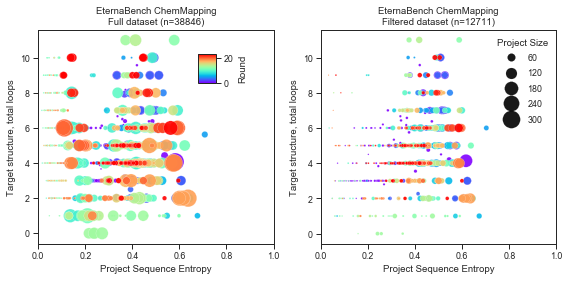

In [8]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

im = ax[0].scatter(proj_stats['Sequence Entropy'], proj_stats['Target structure, total loops'], s=proj_stats['# constructs'],
        c=[int(x.split(' ')[-1]) for x in proj_stats['Dataset']], cmap='rainbow',alpha=0.9,linewidth=0.2,edgecolor='w')
plt.legend(*im.legend_elements("sizes", num=6),title='Project Size',frameon=False)

ax[0].set_title('EternaBench ChemMapping\nFull dataset (n=38846)')
ax[0].set_ylabel('Target structure, total loops')
ax[0].set_xlabel('Project Sequence Entropy')
ax[0].set_xlim([0,1])

cbaxes = fig.add_axes([0.35,0.7, 0.03, 0.1]) 
fig.colorbar(im, cax = cbaxes, label='Round')

ax[1].scatter(proj_stats_filt['Sequence Entropy'], proj_stats_filt['Target structure, total loops'],
        s=proj_stats_filt['# constructs'], c=[int(x.split(' ')[-1]) for x in proj_stats_filt['Dataset']],
        cmap='rainbow',alpha=0.9,linewidth=0.2,edgecolor='w')


# Uncomment to label example projects

# exs=['Robot serial killer 1 - Lab killer too?',
# 'Cloud Lab 5 - The Nonesuch by rnjensen45',
# 'SHAPE Profile - U-U Mismatch - Pilot Run',
#     'Cloud Lab 1 - Aires by wateronthemoon']

# for p in exs:
#     ax[1].text(proj_stats_filt.loc[proj_stats_filt.project_name==p]['Sequence Entropy'].iloc[0]+0.02,
#             proj_stats_filt.loc[proj_stats_filt.project_name==p]['Target structure, total loops'].iloc[0],
#          p,zorder=10)

ax[1].set_title('EternaBench ChemMapping\nFiltered dataset (n=12711)')
ax[1].set_ylabel('Target structure, total loops')
ax[1].set_xlabel('Project Sequence Entropy')
ax[1].set_xlim([0,1])

tight_layout()
#savefig('FIGURES/1/CloudLab_both_bubble_plots.pdf',bbox_inches='tight')

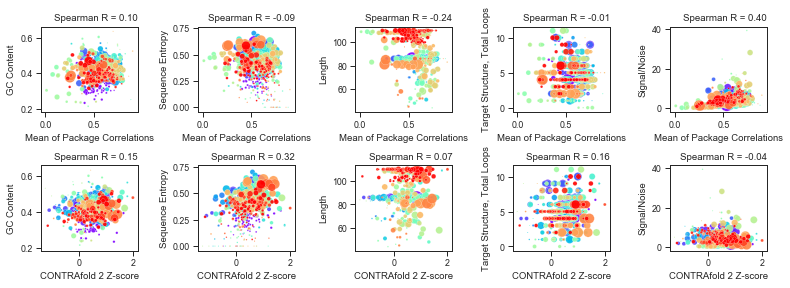

In [11]:
xmetrics = ['Mean_of_package_correlations','cfold_zscore']
#,'Std. in p(unp) calculations'
#'EternaScore',

ymetrics = ['GC content', 'Sequence Entropy','Length','Target structure, total loops','signal_to_noise']

xlabels = ['Mean of Package Correlations', 'CONTRAfold 2 Z-score']
figure(figsize=(11,4))
for i, x in enumerate(xmetrics):
    for j, y in enumerate(ymetrics):
        subplot(len(xmetrics),len(ymetrics),i*len(ymetrics)+j+1)
        scatter(proj_stats_filt[x], proj_stats_filt[y],
        s=proj_stats_filt['# constructs'], c=[int(x.split(' ')[-1]) for x in proj_stats_filt['Dataset']],
        cmap='rainbow',alpha=0.9,linewidth=0.2,edgecolor='w')
        xlabel(xlabels[i])
        ylabel(y.replace('_to_n','/N').title().replace('Gc','GC'))
        
        eb.plot.corrfunc(proj_stats_filt[x], proj_stats_filt[y])
tight_layout()
#savefig('FIGURES/SI/FigureS6_compare_mean_package_corrs.pdf',bbox_inches='tight')
#savefig('FIGURES/SI/FigureS6_compare_mean_package_corrs.png',dpi=300, bbox_inches='tight')

In [13]:
proj_stats_filt.to_csv('SuppTable_project_details.csv',index=False)

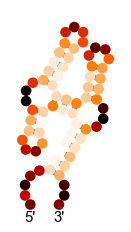

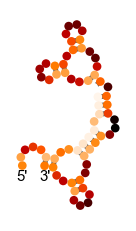

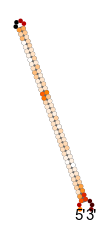

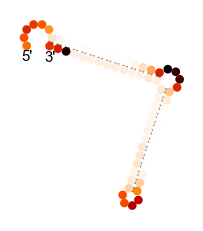

In [14]:
# Visualize subset of projects

project_list = ['New Frontier 3', 'Shape Library 101: The Finger','Cloud Lab 1 - Aires by wateronthemoon', 'Permuted loops', 'Don Quixote']

for proj in exs:
    tmp = df.loc[df.passed_CDHIT_filter==True].loc[df.project_name==proj]
    cat_reac_data = np.vstack([x for x in tmp['reactivity']])
    struct = tmp.iloc[0]['structure'][:-39]
    reac_mean = np.mean(cat_reac_data, axis=0)[:len(struct)]
    fig, ax = plt.subplots(1,1,figsize=(4,4))
    draw_struct(' '*len(struct), struct, c = reac_mean, cmap='gist_heat_r',ax=ax)
    #savefig('FIGURES/1/'+proj+'reac_on_struct.pdf',bbox_inches='tight')

<Figure size 864x432 with 0 Axes>

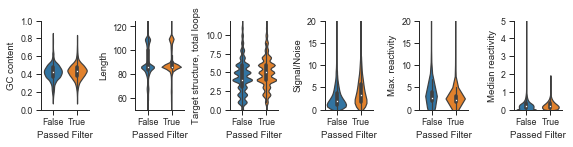

In [154]:
figure(figsize=(12,6))

# proj_stats['EternaBench']='Full (n=38846)'
# proj_stats_filt['EternaBench']='Filtered (n=12711)'
# tmp = pd.concat([proj_stats, proj_stats_filt])

figure(figsize=(8,2))
ymin=[0,50,0,0,0,0]
ymaxes=[1,125,12,20,20,5]
for i, metric in enumerate(['GC content','Length','Target structure, total loops', 'signal_to_noise', 'Max. reactivity','Median reactivity']):
    subplot(1,6,i+1)
    sns.violinplot(x='passed_CDHIT_filter', y=metric, data=df, fliersize=0)
    ylim([ymin[i],ymaxes[i]])
    
    if metric=='signal_to_noise':
        ylabel('Signal/Noise')
        
    xlabel('Passed Filter')
    ax=gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

tight_layout()

savefig('FIGURES/SI/Figure_S3B.pdf',bbox_inches='tight')

In [45]:
stats = df.groupby('Dataset')[['GC content','Length','Target structure, total loops','signal_to_noise']].agg([np.median, np.std, np.size])
filt_stats = df.loc[df.passed_CDHIT_filter==True].groupby('Dataset')[['GC content','Length','Target structure, total loops','signal_to_noise']].agg([np.median, np.std, np.size])
stats.to_csv('TABLES/ChemMapping_FULL_metadata_by_dataset.csv', index=False)
filt_stats.to_csv('TABLES/ChemMapping_Filtered_metadata_by_dataset.csv', index=False)

proj_stats.to_csv('TABLES/ChemMapping_FULL_metadata_by_project.csv', index=False)
proj_stats_filt.to_csv('TABLES/ChemMapping_Filtered_metadata_by_project.csv', index=False)


<Figure size 864x432 with 0 Axes>

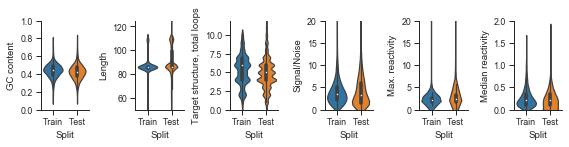

In [18]:
figure(figsize=(12,6))

df_filt = df.loc[df.passed_CDHIT_filter==True]
df_filt['split'] = np.where(df_filt['Dataset'].isin(['Round 03', 'Round 04', 'Round 05', 'Round 07', 'Round 10', 'Round 11']), 'Train','Test')

figure(figsize=(8,2))
ymin=[0,50,0,0,0,0]
ymaxes=[1,125,12,20,20,2]
for i, metric in enumerate(['GC content','Length','Target structure, total loops', 'signal_to_noise', 'Max. reactivity','Median reactivity']):
    subplot(1,6,i+1)
    sns.violinplot(x='split', y=metric, data=df_filt, order=['Train','Test'], fliersize=0)
    ylim([ymin[i],ymaxes[i]])
    
    if metric=='signal_to_noise':
        ylabel('Signal/Noise')
        
    xlabel('Split')
    ax=gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

tight_layout()

savefig('FIGURES/SI/Figure_S14A.pdf',bbox_inches='tight')

In [20]:
print(df_filt[['GC content','Length','Target structure, total loops', 'signal_to_noise', 'split']].groupby('split').median())

       GC content  Length  Target structure, total loops  signal_to_noise
split                                                                    
Test     0.424658      86                              5            3.157
Train    0.443396      86                              6            3.373


In [19]:
df = pd.read_json(os.environ['ETERNABENCH_PATH']+'/data/EternaBench_Riboswitch_FULL_07Aug2021.json.zip')
df['log_AR'] = np.log(df['Activation Ratio'])
df['Length'] = [len(x) for x in df['sequence']]
df['GC content'] = [(x.count('G')+x.count('C'))/len(x) for x in df['sequence']]
df['split'] = np.where(df['Dataset'].str.contains('Ribologic'),'Train','Test')

print(df[['GC content','Length', 'KDON','KDOFF','min_kd_val','Activation Ratio','split']].groupby('split').median())

       GC content  Length       KDON      KDOFF  min_kd_val  Activation Ratio
split                                                                        
Test     0.459459      84  27.383923  52.942920    1.631784          1.460000
Train    0.472973      84  19.939434  26.886432    3.008213          1.182301


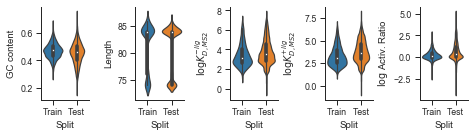

In [23]:
figure(figsize=(8,2))

titles=['GC content','Length',r'$\log K_{D,MS2}^{-lig}$',r'$\log K_{D,MS2}^{+lig}$',r'$\log$ Activ. Ratio']

for i, metric in enumerate(['GC content','Length','logkd_nolig','logkd_lig','log_AR']):
    subplot(1,6,i+1)
    sns.violinplot(x='split', y=metric, data=df)
    
    #ylim([ymin[i],ymaxes[i]])
    ax=gca()
    xlabel('Split')
    ylabel(titles[i])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

tight_layout()

savefig('FIGURES/SI/Figure_S14B.pdf',bbox_inches='tight')

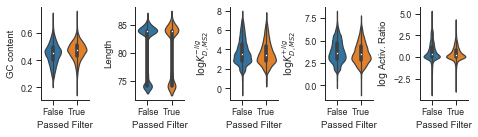

In [24]:
figure(figsize=(8,2))

titles=['GC content','Length',r'$\log K_{D,MS2}^{-lig}$',r'$\log K_{D,MS2}^{+lig}$',r'$\log$ Activ. Ratio']

for i, metric in enumerate(['GC content','Length','logkd_nolig','logkd_lig','log_AR']):
    subplot(1,6,i+1)
    sns.violinplot(x='passed_CDHIT_filter', y=metric, data=df)
    
    #ylim([ymin[i],ymaxes[i]])
    ax=gca()
    xlabel('Passed Filter')
    ylabel(titles[i])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

tight_layout()

savefig('FIGURES/SI/Figure_S3D.pdf',bbox_inches='tight')


In [25]:
tmp = df[['KDOFF','KDON','min_kd_val', 'Activation Ratio', 'Length', 'GC content','Dataset']].groupby('Dataset').median()
tmp['Dataset kind'] = 'Full'
tmp = tmp.reset_index()

tmp2 = df.loc[df.passed_CDHIT_filter][['KDOFF','KDON','min_kd_val', 'Activation Ratio', 'Length', 'GC content','Dataset']].groupby('Dataset').median()
tmp2['Dataset kind'] = 'Filtered'
tmp2.reset_index()

tmp = tmp.append(tmp2, ignore_index=True)

tmp.to_excel('riboswitch_metadata_precursor.xlsx')